# 딥러닝 모델 설계하기 

## 1. ThoraricSurgery 데이터로 생존 예측

### 1. 환경준비, 데이터 준비

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd

# numpy ndarray로 데이터 로드
data_set = np.loadtxt('./data/ThoraricSurgery3.csv', delimiter=',')
data_set[:5]

array([[ 1.  ,  2.88,  2.16,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         3.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , 60.  ,  0.  ],
       [ 2.  ,  3.4 ,  1.88,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , 51.  ,  0.  ],
       [ 2.  ,  2.76,  2.08,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , 59.  ,  0.  ],
       [ 2.  ,  3.68,  3.04,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 54.  ,  0.  ],
       [ 2.  ,  2.44,  0.96,  2.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , 73.  ,  1.  ]])

In [5]:
data_set.shape

(470, 17)

### 2. 피처, 레이블 분리

In [6]:
X = data_set[:, 0:16] # 환자의 진찰 기록을 X로 지정
y = data_set[:, 16] # 수술 1년 후 사망/생존 여부를 y로 지정

### 3. 구조설정

In [7]:
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### 4. 모델 실행

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, y, epochs=30, batch_size=16)

Epoch 1/30
30/30 [==============================] - 1s 2ms/step - loss: 3.1866 - accuracy: 0.1745 
Epoch 2/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.8404
Epoch 3/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.8511
Epoch 4/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.8511
Epoch 5/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8511
Epoch 6/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8511
Epoch 7/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8511
Epoch 8/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.8511
Epoch 9/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8511
Epoch 10/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.8511
Epoch 11/30
30/30 

### 4. 모델 평가

In [9]:
print('\n Accuracy : %.4f'%(model.evaluate(X, y)[1]))

15/15 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8511

 Accuracy : 0.8511


In [10]:
model.evaluate(X, y)[0] # 인덱싱 확인

15/15 [==============================] - 0s 3ms/step - loss: 0.4008 - accuracy: 0.8511


0.4007725119590759

## 2. Pima-indians-diabetes 데이터로 예측하기

### 1. EDA

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 피마 인디언 당뇨병 데이터셋 불러오기
df = pd.read_csv('./data/pima-indians-diabetes3.csv')
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# 당뇨병 환자 분포 확인
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [14]:
df['pregnant'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: pregnant, dtype: int64

In [13]:
# 데이터 기초통계량 확인 
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
# 변수간 상관관계 확인
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


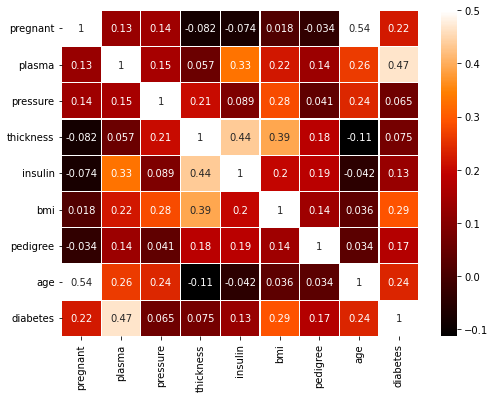

In [16]:
# 상관관계 그래프로 확인 해보기
colormap = plt.cm.gist_heat # 색상 구성 
plt.figure(figsize = (8,6)) # 크기 구성
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True) # 속성 결정
plt.show()
# vmax를 0.5로 설정해 0.5에 가까울 수록 밝은 색으로 표시 

### 2. 중요한 데이터 추출

In [17]:
import warnings 
warnings.filterwarnings('ignore')

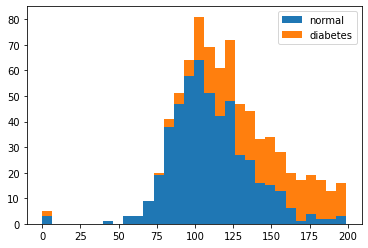

In [20]:
# plasma 기준으로 정상과 당뇨가 어느정도로 분포돼있는지 살펴보기 
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal', 'diabetes'])
# plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal', 'diabetes'])

plt.legend()

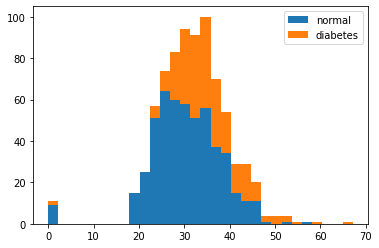

In [21]:
# BMI 기준으로 정상과 당뇨 비율 분포 확인
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label = ['normal', 'diabetes'])
plt.legend()

### 3. 당뇨병 예측 실행 

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터를 피처와 레이블로 나눠주기
X = df.iloc[:, :8]
y = df.iloc[:, 8] 

# 확인
print(X.shape, y.shape)

(768, 8) (768,)


In [24]:
X.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [26]:
# 모델 설정 
model = Sequential()
model.add(Dense(12, input_dim = 8, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name = 'Dense_2'))
model.add(Dense(1, activation='sigmoid', name='Dense_3'))
model.summary() #확인

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 모델 컴파일 
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history = model.fit(X, y, epochs = 100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 1s 2ms/step - loss: 1.3289 - accuracy: 0.4883
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.8486 - accuracy: 0.5365
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7391 - accuracy: 0.5768
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7367 - accuracy: 0.6094
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.6185
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.6068
Epoch 7/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.6445
Epoch 8/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.6172
Epoch 9/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.6576
Epoch 10/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6305 - accura

In [28]:
print('\n Accuracy: %.4f'%(model.evaluate(X, y)[1]))

24/24 [==============================] - 0s 4ms/step - loss: 0.5031 - accuracy: 0.7539

 Accuracy: 0.7539
